## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# displays floats with 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# load in dataset
df = pd.read_csv('./data/kc_house_data.csv')

### First look at the data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
df.iloc[:,:13].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680


In [5]:
df.iloc[:,12:].head()

,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

waterfront, view, and yr_renovated have null values

In [7]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [9]:
df['yr_renovated'].value_counts()

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64

It's possible a 0 value for yr_renovated means it has not been renovated. This could be useful in our model to see if a renovation has had a significant impact on the house price.

In [10]:
len(df['zipcode'].unique())

70

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [12]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00,33,1.75,1620,6000,1.00,NO,NONE,...,7 Average,1040,580.0,1947,0.00,98103,47.69,-122.33,1330,4700


In [13]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2500.0        1
1135.0        1
417.0         1
266.0         1
415.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [15]:
sorted(df['sqft_basement'].unique())

['0.0',
 '10.0',
 '100.0',
 '1000.0',
 '1008.0',
 '1010.0',
 '1020.0',
 '1024.0',
 '1030.0',
 '1040.0',
 '1050.0',
 '1060.0',
 '1070.0',
 '1080.0',
 '1090.0',
 '110.0',
 '1100.0',
 '1110.0',
 '1120.0',
 '1130.0',
 '1135.0',
 '1140.0',
 '1150.0',
 '1160.0',
 '1170.0',
 '1180.0',
 '1190.0',
 '120.0',
 '1200.0',
 '1210.0',
 '1220.0',
 '1230.0',
 '1240.0',
 '1245.0',
 '1248.0',
 '1250.0',
 '1260.0',
 '1270.0',
 '1275.0',
 '1280.0',
 '1281.0',
 '1284.0',
 '1290.0',
 '130.0',
 '1300.0',
 '1310.0',
 '1320.0',
 '1330.0',
 '1340.0',
 '1350.0',
 '1360.0',
 '1370.0',
 '1380.0',
 '1390.0',
 '140.0',
 '1400.0',
 '1410.0',
 '1420.0',
 '143.0',
 '1430.0',
 '1440.0',
 '145.0',
 '1450.0',
 '1460.0',
 '1470.0',
 '1480.0',
 '1481.0',
 '1490.0',
 '150.0',
 '1500.0',
 '1510.0',
 '1520.0',
 '1525.0',
 '1530.0',
 '1540.0',
 '1548.0',
 '1550.0',
 '1560.0',
 '1570.0',
 '1580.0',
 '1590.0',
 '160.0',
 '1600.0',
 '1610.0',
 '1620.0',
 '1630.0',
 '1640.0',
 '1650.0',
 '1660.0',
 '1670.0',
 '1680.0',
 '1690.0',
 '

In [16]:
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.00,3,2.25,1715,6819,2.00,NO,NONE,...,7 Average,1715,?,1995,0.00,98003,47.31,-122.33,2238,6819
18,16000397,12/5/2014,189000.00,2,1.00,1200,9850,1.00,NO,NONE,...,7 Average,1200,?,1921,0.00,98002,47.31,-122.21,1060,5095
42,7203220400,7/7/2014,861990.00,5,2.75,3595,5639,2.00,NO,NONE,...,9 Better,3595,?,2014,0.00,98053,47.68,-122.02,3625,5639
79,1531000030,3/23/2015,720000.00,4,2.50,3450,39683,2.00,NO,NONE,...,10 Very Good,3450,?,2002,0.00,98010,47.34,-122.03,3350,39750
112,2525310310,9/16/2014,272500.00,3,1.75,1540,12600,1.00,NO,NONE,...,7 Average,1160,?,1980,0.00,98038,47.36,-122.03,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.00,5,3.00,2360,5000,1.00,NO,NONE,...,7 Average,1390,?,2008,0.00,98103,47.69,-122.33,2180,5009
21447,1760650900,7/21/2014,337500.00,4,2.50,2330,4907,2.00,NO,NONE,...,7 Average,2330,?,2013,nan,98042,47.36,-122.08,2300,3836
21473,6021503707,1/20/2015,352500.00,2,2.50,980,1010,3.00,NaN,NONE,...,8 Good,980,?,2008,0.00,98117,47.68,-122.39,980,1023
21519,2909310100,10/15/2014,332000.00,4,2.50,2380,5737,2.00,NO,NONE,...,7 Average,2380,?,2010,0.00,98023,47.28,-122.36,2380,5396


### Handling missing values

For waterfront we could fill in missing values with "Unknown". We could also drop these values but there are 2376 of them which is a bit high. We can also find out which of the homes are on the water and manually enter a "Yes" value for them. We could drop view null values because there are only 63 of them. yr_renovated does not seem to be relevant to our analysis so we may drop this column all together.

In [17]:
# Fill waterfront with "Unknown" and group by mean
df[['price','waterfront']].fillna("Unknown").groupby(by='waterfront').mean()

,price
waterfront,
NO,532641.99
Unknown,529430.07
YES,1717214.73


### Invalid columns

sqft_basement has "?" where there are no values so the column is a string type when it should be an integer. To work around this we can create a new column sf_basement = sqft_living - sqft_above this will give us all the values for the square foot of the basement.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
df.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

### Assigning Numbers to Categorical Variables

Condition

Grade

View

## Exploratory Data Analysis

<AxesSubplot:xlabel='view', ylabel='price'>

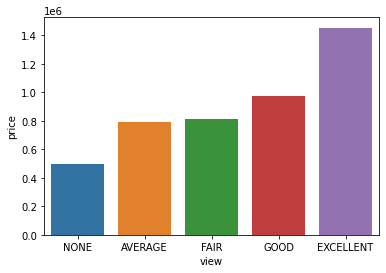

In [21]:
# Drop Null values from view column
view_price = df.dropna(subset=['view'])[['price','view']].groupby(by='view').mean().sort_values(by='price')

sns.barplot(data=view_price.reset_index(), x='view', y='price')

<AxesSubplot:xlabel='grade', ylabel='price'>

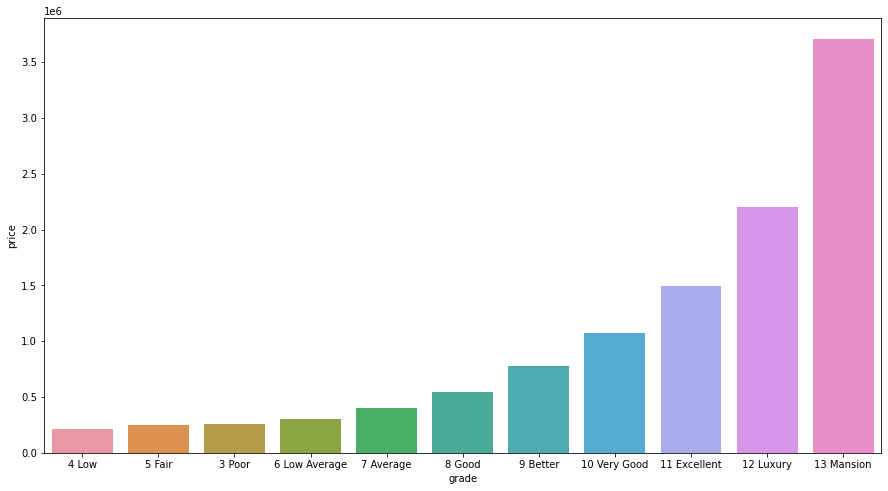

In [22]:
grade_price = df[['price','grade']].groupby(by='grade').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=grade_price, x='grade', y='price', ax=ax)

<AxesSubplot:xlabel='condition', ylabel='price'>

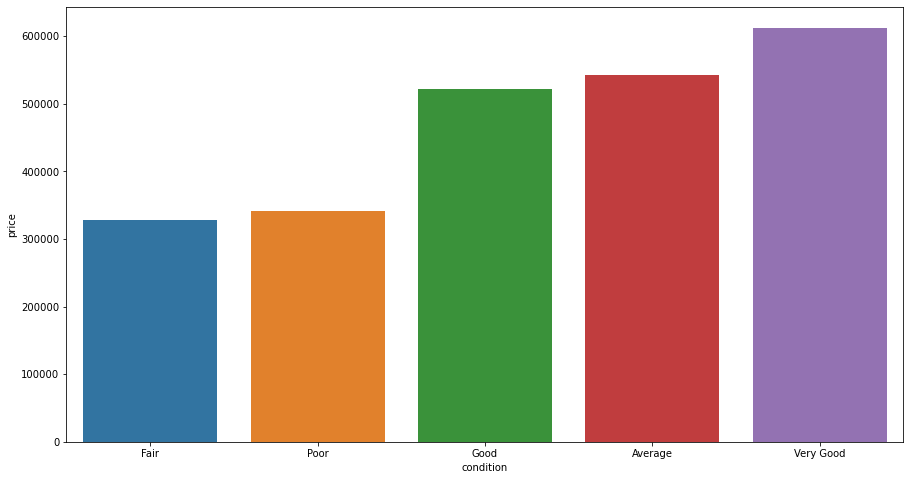

In [23]:
condition_price = df[['price','condition']].groupby(by='condition').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=condition_price, x='condition', y='price', ax=ax)

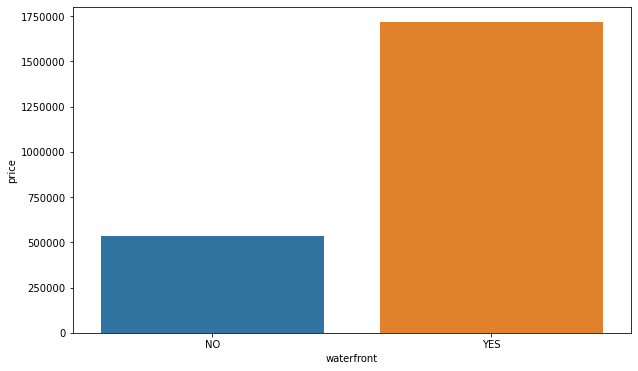

In [24]:
waterfront_price = df[['price','waterfront']].groupby(by='waterfront').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_price, x='waterfront', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

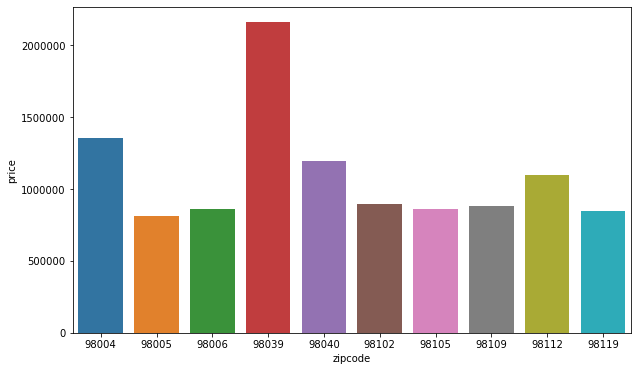

In [25]:
# top 10 zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode').mean().reset_index().sort_values(by='price')\
.nlargest(10, columns='price')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

Now I'll look at relationships of variables with scatter plots

In [26]:
df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,1180,1955,0.00,98178,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,2170,1951,1991.00,98125,1690,7639
2,180000.00,2,1.00,770,10000,1.00,770,1933,nan,98028,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,1050,1965,0.00,98136,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,1680,1987,0.00,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,1530,2009,0.00,98103,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,2310,2014,0.00,98146,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,1020,2009,0.00,98144,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,1600,2004,0.00,98027,1410,1287


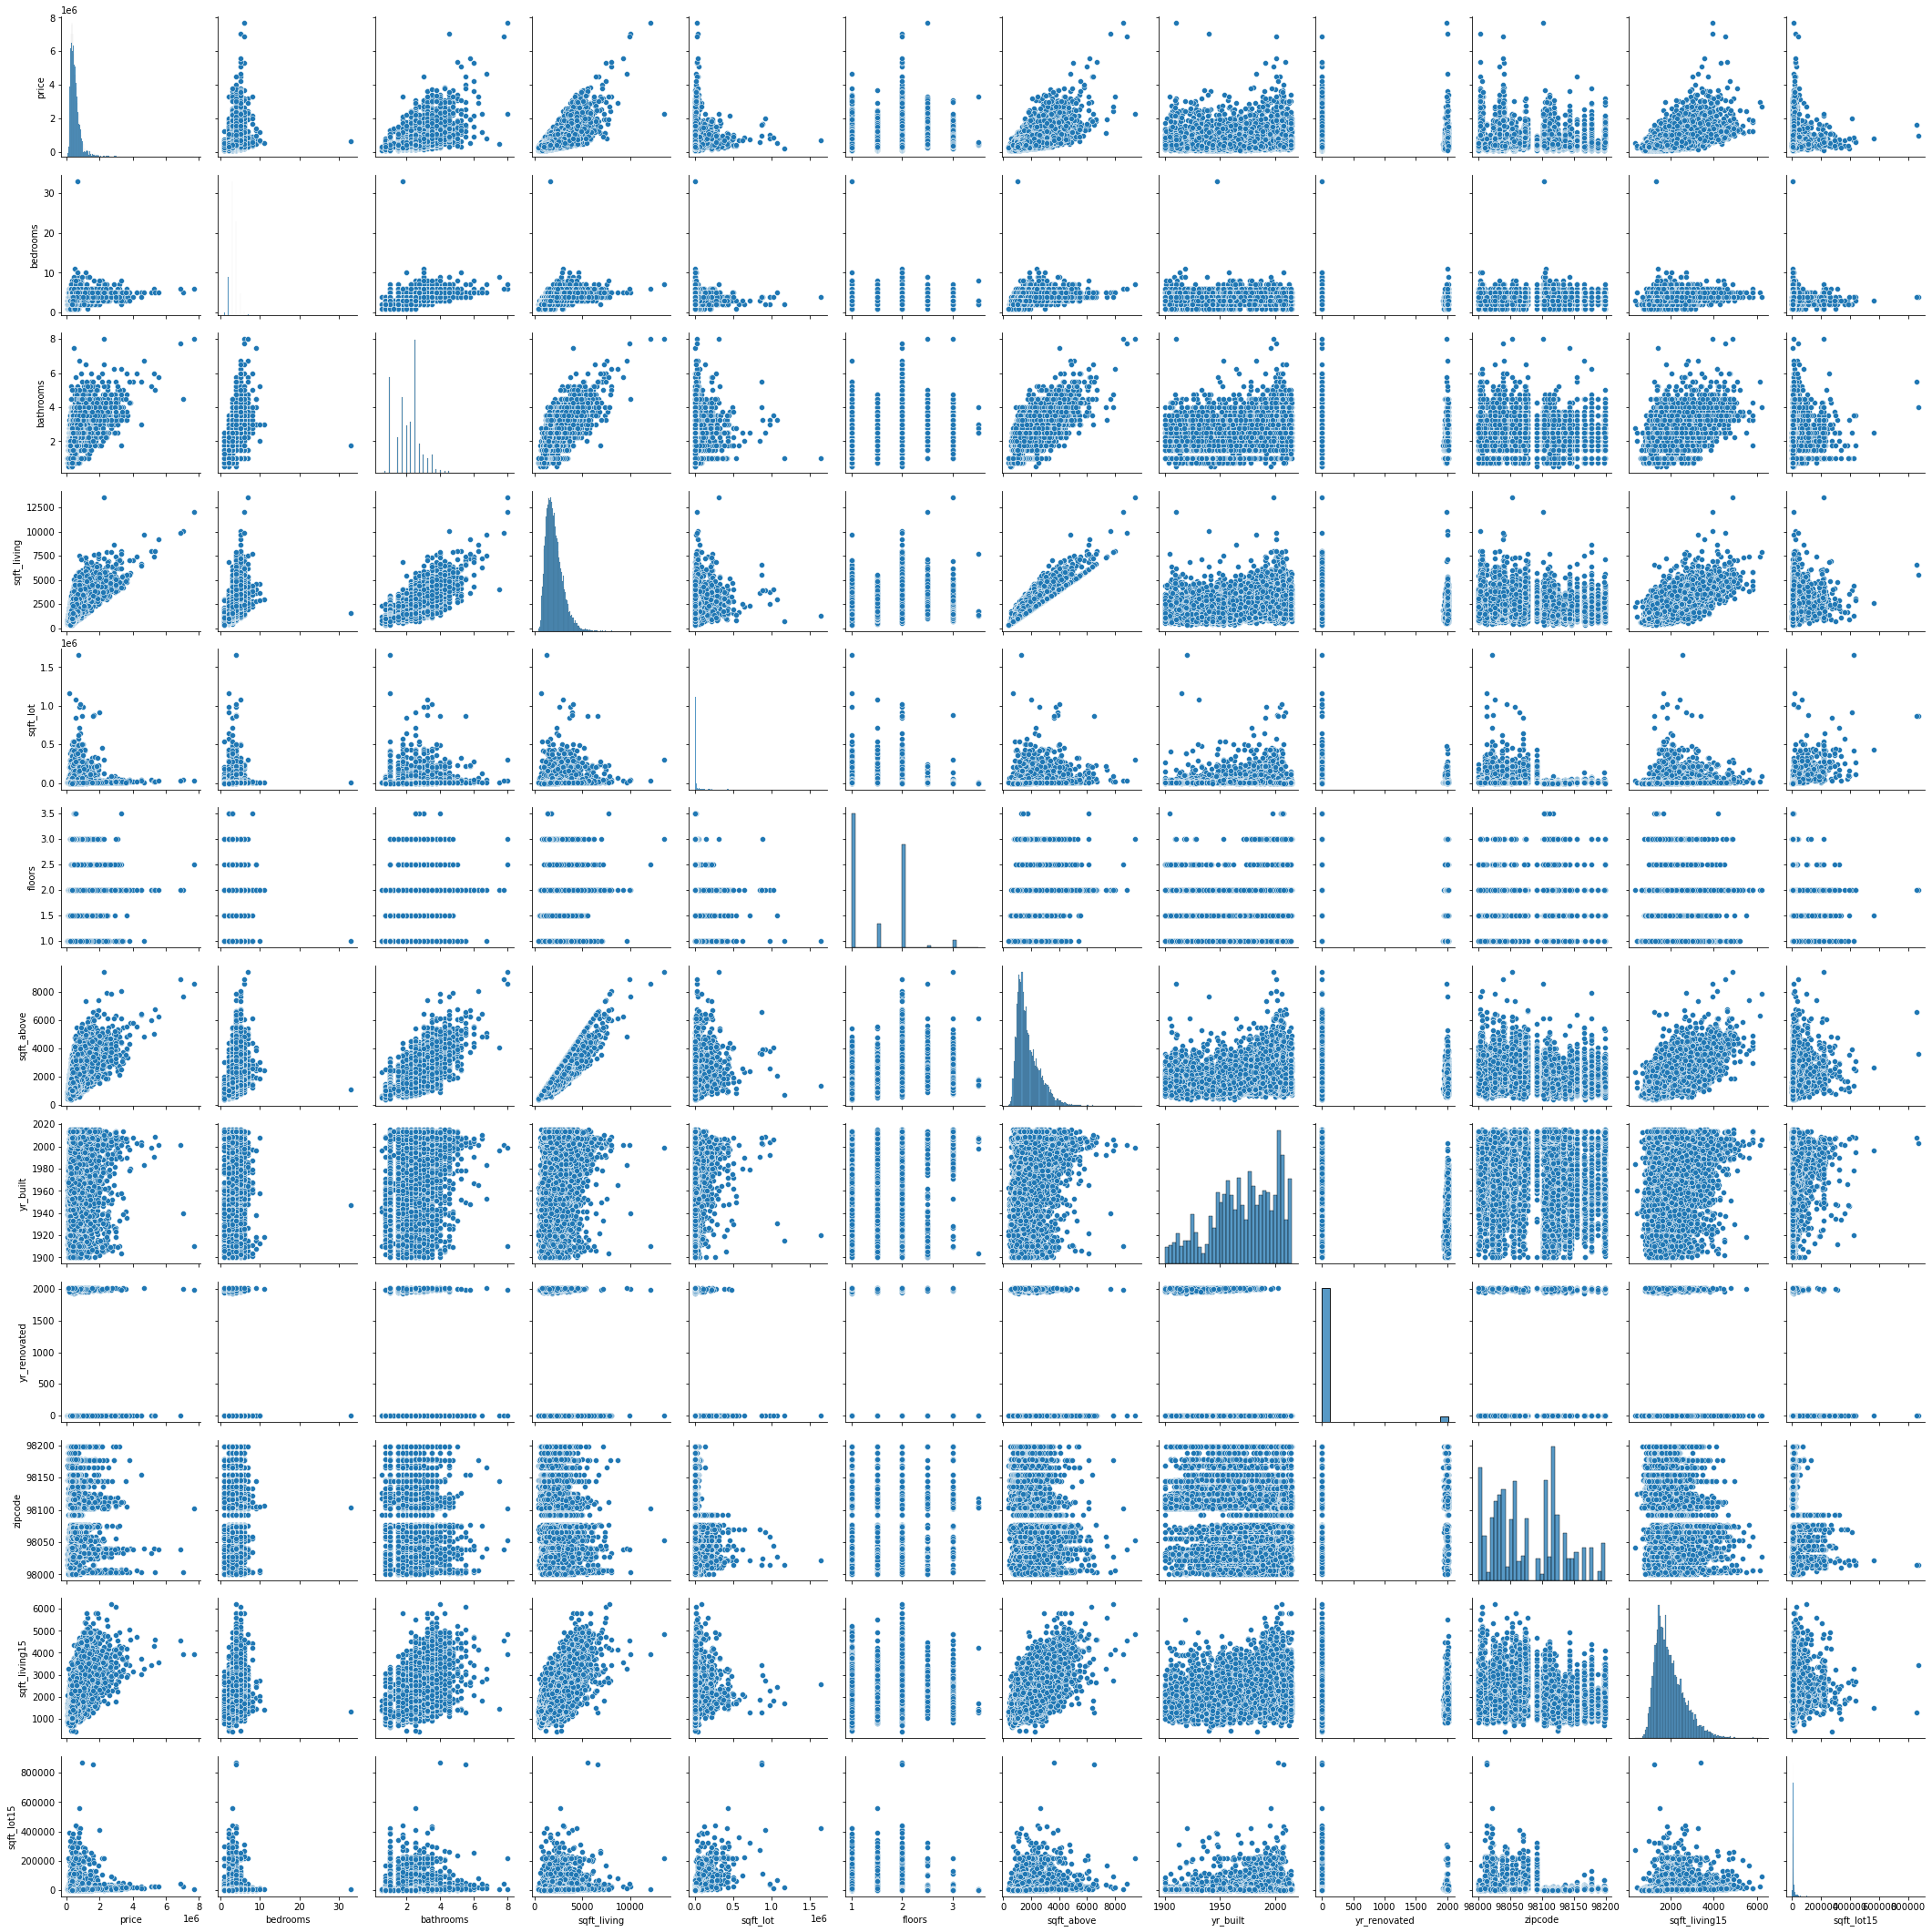

In [27]:
# pair plots in seaborn
sns.pairplot(data=df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long']))

### Square Foot of Living Across Conditional Variables

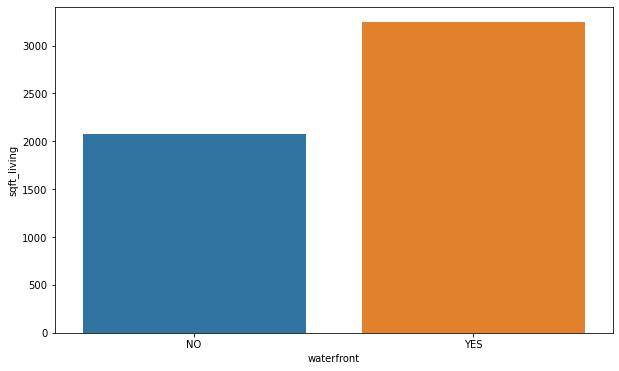

In [31]:
# average square foot of waterfront homes
waterfront_sqft = df[['sqft_living','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='sqft_living').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_sqft, x='waterfront', y='sqft_living', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

<AxesSubplot:xlabel='view', ylabel='sqft_living'>

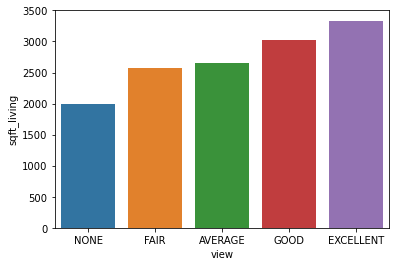

In [36]:
# Average square foot by view
view_sqft = df[['sqft_living', 'view']].groupby(by='view').mean().reset_index().\
sort_values(by='sqft_living')

sns.barplot(data=view_sqft, x='view', y='sqft_living')

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

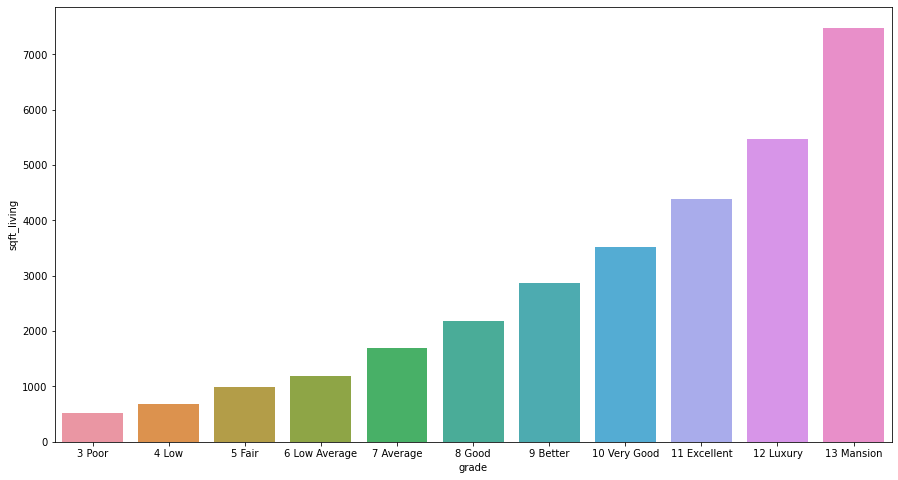

In [40]:
# Average square foot by grade
sqft_grade = df[['sqft_living', 'grade']].groupby(by='grade').mean().\
reset_index().sort_values(by='sqft_living')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

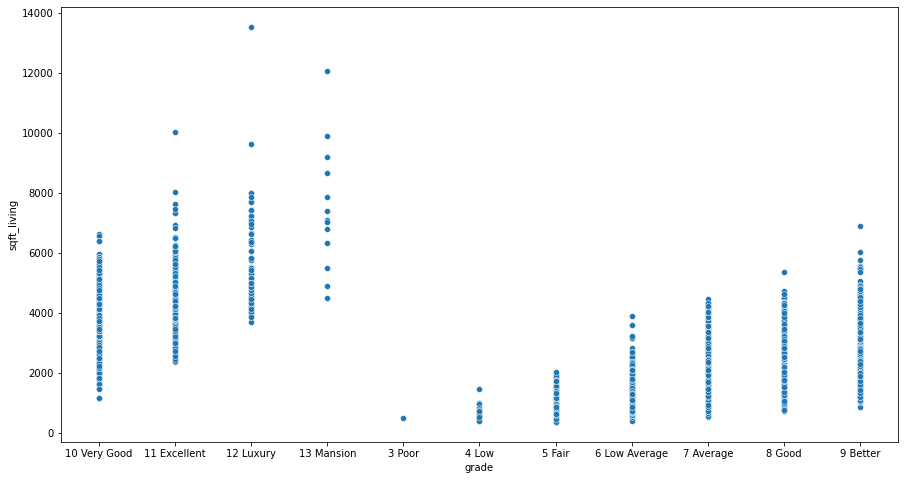

In [45]:
# Scatter plot average square foot and grade
sqft_grade = df[['sqft_living', 'grade']].sort_values(by='grade')

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)